<a href="https://colab.research.google.com/github/Polt3r/PLN/blob/main/Aula_13_Redes_Neurais_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo da Aula 14 – Redes Neurais para PLN

Implementação de duas arquiteturas de redes neurais para resolver problemas específicos de PLN (Processamento de Linguagem Natural).

O notebook implementa e demonstra duas aplicações básicas de redes neurais em PLN: previsão da próxima palavra com uma Simple RNN e classificação de sentimentos com uma LSTM, cobrindo desde a preparação dos dados até a construção, treinamento, avaliação e uso dos modelos.



Utilização de técnicas e ferramentas para:

>- **RNN Simples para Previsão de Próxima Palavra:**
  - Preparação e pré-processamento de dados textuais
  - Criação de sequências de entrada e targets
  - Tokenização e conversão para representações numéricas
  - Implementação de RNN com TensorFlow/Keras
  - Treinamento do modelo para previsão sequencial
  - Avaliação e geração de texto

---

>- **LSTM para Classificação de Sentimentos:**
  - Preparação de dataset rotulado (positivo/negativo)
  - Pré-processamento específico para classificação
  - Implementação de arquitetura LSTM
  - Treinamento supervisionado para classificação binária
  - Avaliação com métricas de classificação
  - Comparação de desempenho com modelos tradicionais

---

>- **Conceitos Fundamentais:**
  - Diferenças entre RNN e LSTM
  - Problema do desvanecimento do gradiente
  - Arquiteturas sequenciais vs. classificação
  - Embeddings de palavras e representações densas
  - Técnicas de regularização (Dropout, Early Stopping)

---

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


Explicação das Bibliotecas:

numpy: Fundamental para manipulação de arrays multidimensionais e operações matemáticas eficientes
tensorflow.keras: Framework de alto nível para desenvolvimento e treinamento de modelos de aprendizado profundo
Embedding: Camada responsável por converter índices de palavras em representações vetoriais densas
SimpleRNN: Implementação básica de rede neural recorrente para processamento sequencial
Dense: Camada totalmente conectada para transformações lineares e não-lineares
Tokenizer: Ferramenta para transformar texto em sequências numéricas baseadas em vocabulário
pad_sequences: Função para padronizar o tamanho das sequências, garantindo entradas uniformes para o modelo
Tentar novamenteO Claude pode cometer erros. Confira sempre as respostas.

In [2]:
# Passo 2: Preparação do Conjunto de Dados

# Conjunto de dados de treinamento (pequeno e simplificado)
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "adoro resolver problemas com código",
    "gosto de aprender coisas novas"
]
print(f"Textos de treinamento: {textos_treinamento}")

# Inicializar o Tokenizer
tokenizer = Tokenizer()

# Construir o vocabulário a partir dos textos
tokenizer.fit_on_texts(textos_treinamento)

# Converter textos em sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Imprimir o vocabulário e as sequências geradas
print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas dos textos: {sequencias}")

# Determinar o comprimento máximo das sequências (para o padding)
total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")

# Preparar entradas (X) e saídas (y) para a previsão da próxima palavra
# A entrada (X) será uma sequência de palavras, e a saída (y) será a palavra seguinte.
# Determinar o comprimento máximo das sequências para padding
max_comprimento = max(len(seq) for seq in sequencias)
print(f"Comprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequência parcial) e saída (próxima palavra)
# Ex: "eu gosto de programar" -> "em"
#     "gosto de programar em" -> "python"
entradas_X = []
saidas_y = []

for seq in sequencias:
    for i in range(1, len(seq)):
        entradas_X.append(seq[:i])  # A sequência até a palavra atual
        saidas_y.append(seq[i])     # A próxima palavra

print(f"Exemplo de entradas_X (parcial): {entradas_X[:5]}")
print(f"Exemplo de saidas_y (parcial): {saidas_y[:5]}")

# Padronizar o comprimento das sequências de entrada
# Usar pad_sequences para garantir que todas as sequências tenham o mesmo comprimento e RNN
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento - 1, padding='pre')
# O maxlen é 'max_comprimento - 1' porque a saída 'y' é a última palavra, então X terá 1 palavra a menos.

# Converter as saídas para o formato one-hot encoding
# Isso é necessário para a camada de saída da RNN (softmax)
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_X_padded (após padding e truncagem): {entradas_X_padded[:5]}")
print(f"Exemplo de saidas_y_one_hot (one-hot encoding): {saidas_y_one_hot[:5]}")
print(f"Formato final das entradas (X): {entradas_X_padded.shape}")
print(f"Formato final das saídas (y): {saidas_y_one_hot.shape}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'adoro resolver problemas com código', 'gosto de aprender coisas novas']

Vocabulário (palavra: índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'com': 6, 'eu': 7, 'em': 8, 'uma': 9, 'linguagem': 10, 'poderosa': 11, 'divertido': 12, 'adoro': 13, 'resolver': 14, 'problemas': 15, 'código': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequências numéricas dos textos: [[7, 2, 3, 4, 8, 1], [1, 5, 9, 10, 11], [4, 5, 12, 6, 1], [13, 14, 15, 6, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20
Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_X (parcial): [[7], [7, 2], [7, 2, 3], [7, 2, 3, 4], [7, 2, 3, 4, 8]]
Exemplo de saidas_y (parcial): [2, 3, 4, 8, 1]

Exemplo de entradas_X_padded (após padding e truncagem): [[0 0 0 0 7]
 [0 0 0 7 2]
 [0 0 7 2 3]
 [0 7 2 3 4]
 [7 2 3 4 8]]
Exemplo de saidas_y_one_hot (one-hot

Este bloco foca na preparação de um pequeno conjunto de dados textuais para treinar uma Simple RNN na previsão da próxima palavra. Ele tokeniza o texto, cria sequências numéricas, determina o tamanho do vocabulário e prepara os pares de entrada (sequência parcial) e saída (próxima palavra) no formato adequado para a RNN, incluindo padding e one-hot encoding.

In [3]:
# Passo 3: Construção do Modelo RNN

# 1. Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential()

# Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento das sequências de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add(SimpleRNN(32))

# Camada Densa de Saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (como 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Este bloco foca na preparação de um pequeno conjunto de dados textuais para treinar uma Simple RNN na previsão da próxima palavra. Ele tokeniza o texto, cria sequências numéricas, determina o tamanho do vocabulário e prepara os pares de entrada (sequência parcial) e saída (próxima palavra) no formato adequado para a RNN, incluindo padding e one-hot encoding.

In [4]:
# Passo 4: Treinamento do Modelo

# Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)
#     epochs: quantas vezes o modelo verá todo o conjunto de dados
#     verbose: 1 para mostrar o progresso do treinamento
print("Treinamento concluído!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0476 - loss: 2.9900
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0952 - loss: 2.9819
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1429 - loss: 2.9738
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1429 - loss: 2.9656
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1429 - loss: 2.9572
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1429 - loss: 2.9487
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1429 - loss: 2.9400
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1429 - loss: 2.9310
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1429 - loss: 2.9218
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1429 - loss: 2.9122
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1429 - loss: 2.9023
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━

Este bloco executa o treinamento do modelo Simple RNN usando os dados preparados. Ele especifica o número de épocas (quantas vezes o modelo revisa os dados) para o processo de aprendizado.

In [5]:
# Passo 5: Usar o Modelo para Previsão

# 1. Função de Previsão:
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
    """
    Preve a próxima palavra dado um texto base.
    """
    # Converter o texto base para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Aplicar o comprimento da sequência de entrada (precisa ter o mesmo formato que o treinamento)
    # Atenção: max_seq_len deve ser o comprimento que as "entradas" foram pad_sequences
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

    # Fazer a previsão
    previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

    # Obter o índice da palavra com a maior probabilidade
    indice_palavra_prevista = np.argmax(previsao_probabilidades)

    # Converter o índice de volta para a palavra
    for palavra, indice in tokenizer.word_index.items():
        if indice == indice_palavra_prevista:
            return palavra

    return None  # Caso a palavra não seja encontrada (improvável com o vocabulário ajustado)

# Comprimento de entrada esperado pelo modelo
max_seq_len = entradas_X_padded.shape[1]  # o modelo que usamos no pad_sequences para X
print(f"Comprimento máximo esperado para as entradas: {max_seq_len}")

# Testar o modelo com novas frases
print("\n--- Testando o Modelo RNN ---")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, max_seq_len, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, max_seq_len, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, max_seq_len, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, max_seq_len, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Função para usar uma palavra nova não vista no treinamento (ou sequência que o modelo nunca viu antes)
texto_teste_5 = "o sol brilha no" # Palavras "sol" e "brilha" não estão no vocabulário
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, max_seq_len, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}' (Note ser imprecisa devido às palavras desconhecidas)")

Comprimento máximo esperado para as entradas: 5

--- Testando o Modelo RNN ---
Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'com'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'é'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'de' (Note ser imprecisa devido às palavras desconhecidas)


Este bloco contém uma função para usar o modelo RNN treinado para prever a próxima palavra dado um texto base. Ele demonstra como usar a função com alguns exemplos, mostrando a palavra prevista para diferentes entradas.

In [11]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


Similar ao primeiro bloco, mas importa bibliotecas específicas e adicionais para a tarefa de Classificação de Sentimentos usando LSTM, incluindo a camada LSTM, train_test_split para dividir dados, e classification_report, confusion_matrix, matplotlib e seaborn para avaliação e visualização de resultados.

In [13]:
# Definir o conjunto de dados (frases e rótulos) para análise de sentimentos
dados_sentimento = [
    ("este filme é ótimo e divertido", "positivo"),
    ("não adorei o livro, muito baixo", "negativo"),
    ("a experiência foi incrível e satisfatória", "positivo"),
    ("o roteiro é fraco e chato", "negativo"),
    ("não recomendo esta péssima produto", "negativo"),
    ("adorei a nova versão do aplicativo", "positivo"),
    ("ótimo trabalho, parabéns", "positivo"),
    ("terrível experiência, nunca mais", "negativo"),
    ("excelente serviço, muito eficiente", "positivo"),
    ("que decepção, muito ruim", "negativo"),
    ("fantástico, recomendo para todos", "positivo"),
    ("blu é um campo interessante", "positivo"),
    ("este software travou várias vezes", "negativo"),
    ("perfeito, funciona como esperado", "positivo"),
    ("o aplicativo é super útil e rápido", "positivo"),
]

# Separar textos e sentimentos
textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

# Mapear sentimentos para números (converter "positivo" e "negativo" para 0 e 1)
mapeamento_sentimentos = {"negativo": 0, "positivo": 1}
rotulos_numericos = [mapeamento_sentimentos[sentimento] for sentimento in sentimentos]

print(f"\nSentimentos mapeados para números: {rotulos_numericos}")

# Tokenização de Texto
tokenizer = Tokenizer(num_words=None, oov_token="<unk>")
# num_words=None para pegar todo o vocabulário
# oov_token para palavras desconhecidas
tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1  # +1 para o padding/UNK
print(f"\nTotal de palavras únicas: {total_palavras_vocab}")
print(f"Sequências numéricas das frases: {sequencias_numericas[:3]}")
print(f"Tamanho total do vocabulário: {total_palavras_vocab}")

# Padronizar o comprimento das sequências
max_comprimento = max(len(seq) for seq in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_comprimento}")

sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_comprimento, padding='post')  # 'post' para adicionar zeros no final
print(f"\nSequências após padding: {sequencias_padded[:3]}")

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

# Converter as listas y_treino e y_teste para arrays NumPy
y_treino = np.array(y_treino)
y_teste = np.array(y_teste)


print(f"\nShape de X_treino: {X_treino.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'não adorei o livro, muito baixo', 'a experiência foi incrível e satisfatória']
Exemplo de sentimentos: ['positivo', 'negativo', 'positivo']

Sentimentos mapeados para números: [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

Total de palavras únicas: 59
Sequências numéricas das frases: [[6, 14, 2, 7, 3, 15], [8, 9, 4, 16, 5, 17], [10, 11, 18, 19, 3, 20]]
Tamanho total do vocabulário: 59

Comprimento máximo das sequências: 7

Sequências após padding: [[ 6 14  2  7  3 15  0]
 [ 8  9  4 16  5 17  0]
 [10 11 18 19  3 20  0]]

Shape de X_treino: (12, 7)
Shape de X_teste: (3, 7)
Shape de y_treino: (12,)
Shape de y_teste: (3,)


Este bloco prepara um conjunto de dados de frases rotuladas (positivo/negativo) para a tarefa de classificação de sentimentos. Ele separa textos e rótulos, mapeia sentimentos para números, tokeniza as frases, padroniza o comprimento das sequências e divide os dados em conjuntos de treino e teste usando train_test_split.

In [15]:
# Definir a arquitetura do modelo LSTM
modelo_lstm = Sequential()

# Camada de Embedding: converte índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# embedding_dim: 50 dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequências (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_comprimento))

# Camada LSTM:
# 64: número de unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropout: um tipo de regularização para evitar overfitting (descarta aleatoriamente neurônios durante o treinamento).
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))

# Camada Densa de Saída:
# 1: um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': função de ativação para classificação binária (produz um valor entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Define a arquitetura do modelo LSTM para classificação de sentimentos. Inclui uma camada de Embedding, uma camada LSTM (com dropout para regularização) e uma camada Dense de saída com ativação sigmoid para a classificação binária. O modelo é então compilado.


Iniciando o treinamento do modelo LSTM...
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.3542 - loss: 0.6954 - val_accuracy: 0.6667 - val_loss: 0.6937
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.6923 - val_accuracy: 0.6667 - val_loss: 0.6930
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7778 - loss: 0.6883 - val_accuracy: 0.6667 - val_loss: 0.6936
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5787 - loss: 0.6900 - val_accuracy: 0.6667 - val_loss: 0.6924
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4931 - loss: 0.6848 - val_accuracy: 0.6667 - val_loss: 0.6908
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7778 - loss: 0.6714 - val_accuracy: 0.6667 - val_loss: 0.6876
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7292 - loss: 0.6580 - val_accuracy: 0.6667 - val_loss: 0.6858
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7315 - loss: 0.674

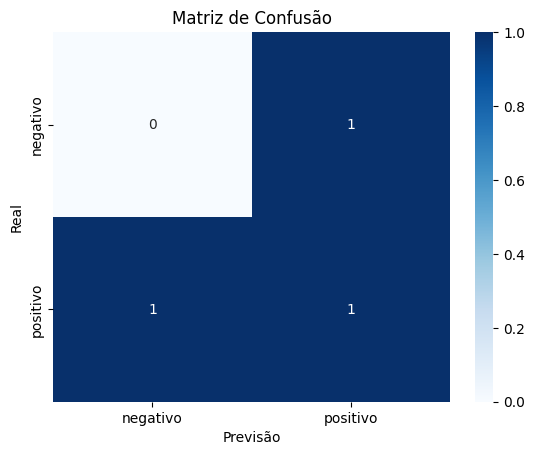

In [16]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino, y_treino,
    epochs=20,  # Reduza para 20 epochs para um treinamento mais rápido no exemplo. Pode ser aumentado.
    batch_size=2,  # Pequeno batch size para dataset pequeno.
    validation_split=0.2,  # Usar 20% de treino para validação
    verbose=1
)
# epochs: número de vezes que o modelo verá todo o conjunto de dados de treinamento.
# batch_size: quantos exemplos o modelo processa por vez ao atualizar os pesos.
# validation_split: % dos dados de treino usados para validação durante o treinamento (opcional, mas bem para monitorar overfitting).
print("Treinamento concluído!")

# Avaliar o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"\nAcurácia do modelo no conjunto de teste: {acuracia:.2f}")
print(f"Perda no conjunto de teste: {perda:.2f}")

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)
y_pred = (y_pred_prob > 0.5).astype(int)  # Converter probabilidades para 0 ou 1

print("\n--- Relatório de Classificação ---")
print(classification_report(y_teste, y_pred, target_names=['negativo', 'positivo']))

print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Este bloco treina o modelo LSTM usando os dados de treino e avalia seu desempenho no conjunto de teste. Ele imprime a acurácia e a perda, e mostra um relatório de classificação e uma matriz de confusão para detalhar os resultados da classificação.

In [20]:
# Passo 5: Testar o Modelo com Novas Frases

# Utilizando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimentos):
    """
    Prevê o sentimento de uma nova frase.
    """
    # Converter a frase para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

    # Se a frase tem palavras desconhecidas, o tokenizer pode retornar uma lista vazia ou valores 0
    if not sequencia_numerica or not sequencia_numerica[0]:
        print(f"Aviso: a frase '{frase_nova}' contém apenas palavras desconhecidas.")
        return "não é possível" # ou outra indicação

    sequencia_numerica = sequencia_numerica[0]  # Pega a primeira (e única) sequência

    # Padronizar o comprimento da sequência de entrada
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_comprimento, padding='post')

    # Fazer a previsão (probabilidade)
    probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

    # Inverter o mapeamento para obter o nome do sentimento
    mapeamento_inverso = {v: k for k, v in mapeamento_sentimentos.items()}

    # Classificar com base no limiar de 0.5
    if probabilidade_positiva >= 0.5:
        return mapeamento_inverso[1] # 'positivo'
    else:
        return mapeamento_inverso[0] # 'negativo'

# Testar o modelo com novas frases
print("\n--- Testando o Modelo LSTM com Novas Frases ---")

# Novas frases inventadas, mantendo o contexto de sentimento
frase_nova_1 = "adorei a performance, foi espetacular!" # Positivo
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_1, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "que experiência frustrante, não funcionou" # Negativo
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_2, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_2}'")

frase_nova_3 = "o resultado foi surpreendente de bom" # Positivo
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_3, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "este serviço é inaceitável de tão ruim" # Negativo
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_4, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "tivemos um dia maravilhoso no parque" # Positivo
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_5, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "a comida estava sem gosto e fria" # Negativo
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_6, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "recomendo fortemente, vale cada centavo" # Positivo
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_comprimento, frase_nova_7, mapeamento_sentimentos)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")


--- Testando o Modelo LSTM com Novas Frases ---
Frase: 'adorei a performance, foi espetacular!' -> Sentimento previsto: 'positivo'
Frase: 'que experiência frustrante, não funcionou' -> Sentimento previsto: 'negativo'
Frase: 'o resultado foi surpreendente de bom' -> Sentimento previsto: 'negativo'
Frase: 'este serviço é inaceitável de tão ruim' -> Sentimento previsto: 'positivo'
Frase: 'tivemos um dia maravilhoso no parque' -> Sentimento previsto: 'positivo'
Frase: 'a comida estava sem gosto e fria' -> Sentimento previsto: 'positivo'
Frase: 'recomendo fortemente, vale cada centavo' -> Sentimento previsto: 'positivo'


Contém uma função para prever o sentimento de novas frases usando o modelo LSTM treinado. Ele demonstra como usar a função com vários exemplos de frases, mostrando o sentimento previsto (positivo ou negativo) para cada uma, com certa margem de erro, teste de reforço de treino.